In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import scipy as sp

In [32]:
path = 'powered flight/5'
file = 'blackbox_log_2023-11-29_154841.02.csv'
data = pd.read_csv(path + '/' + file)

In [33]:
time = data['time (us)'].values
time = time - time[0]
time = time / 1e6
end_idx = np.where(time < 34)[0][-1]
time = time[:end_idx]
start_idx = np.where(time > 15)[0][0]
time = time[start_idx:]
# end_idx = len(time)
# start_idx = 0

In [34]:
from scipy.signal import savgol_filter
from scipy.signal import butter
from scipy.signal import filtfilt

def butter_lowpass_filter(data, cutoff, fs, order=4):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b,a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

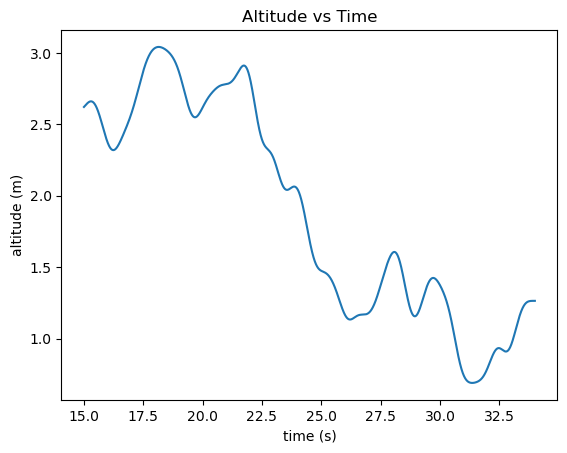

In [35]:
altiude = data['BaroAlt (cm)'].values
altiude = altiude / 100
altiude = altiude[start_idx:end_idx]
altiude = butter_lowpass_filter(altiude, 1, 1000, order=4)
plt.plot(time, altiude, label='altitude')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.title('Altitude vs Time')

# plt.savefig(path + '/altitude.png')
plt.show()

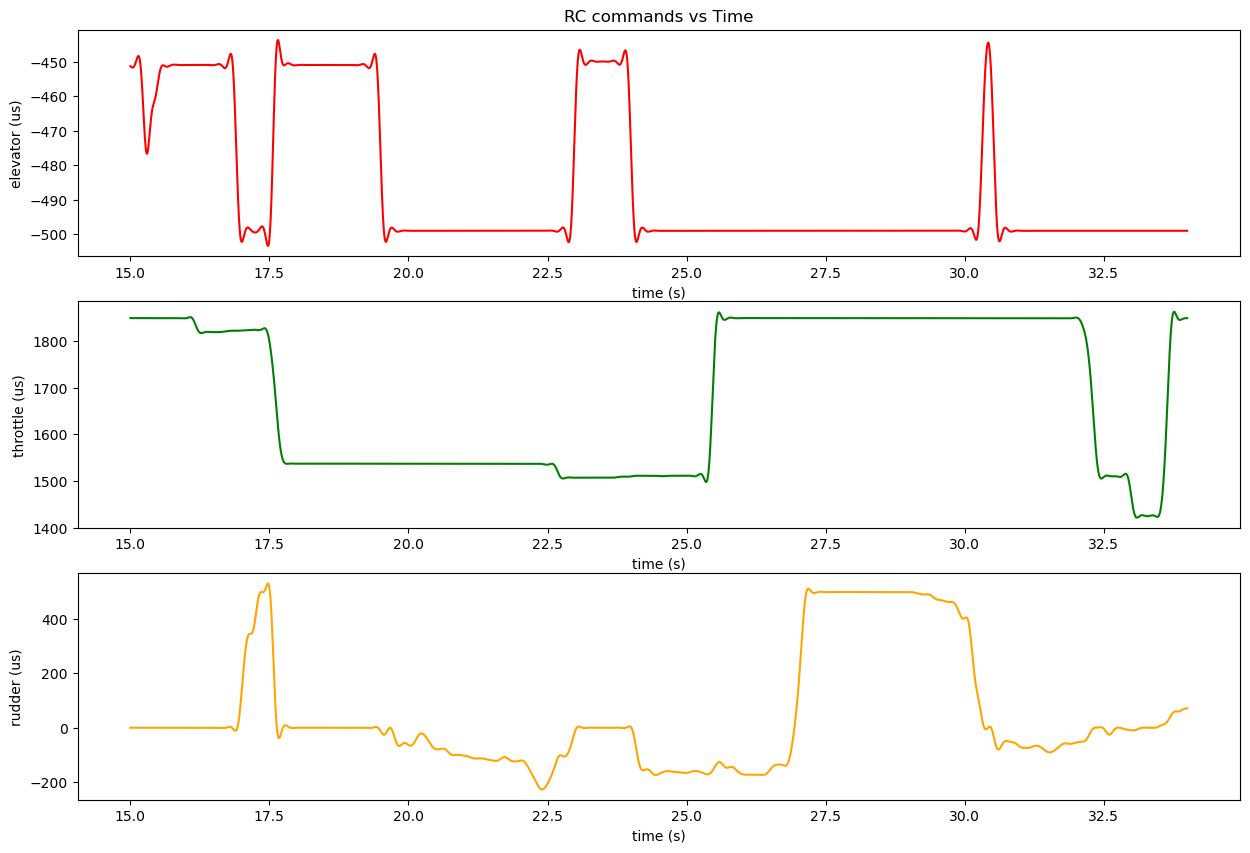

In [36]:
rc_ele = data['rcCommand[1]'].values
rc_ele = rc_ele[start_idx:end_idx]
rc_ele = butter_lowpass_filter(rc_ele, 5, 1000, order=4)
rc_thr = data['rcCommand[3]'].values 
rc_thr = rc_thr[start_idx:end_idx]
rc_thr = butter_lowpass_filter(rc_thr, 5, 1000, order=4)
rc_rud = data['rcCommand[0]'].values
rc_rud = rc_rud[start_idx:end_idx]
rc_rud = butter_lowpass_filter(rc_rud, 5, 1000, order=4)

fig = plt.figure(figsize=(15,10))

plt.subplot(3,1,1)
plt.plot(time, rc_ele, label='elevator', color='red')
plt.xlabel('time (s)')
plt.ylabel('elevator (us)')
plt.title('RC commands vs Time')

plt.subplot(3,1,2)
plt.plot(time, rc_thr, label='throttle', color='green')
plt.xlabel('time (s)')
plt.ylabel('throttle (us)')

plt.subplot(3,1,3)
plt.plot(time, rc_rud, label='rudder', color='orange')
plt.xlabel('time (s)')
plt.ylabel('rudder (us)')

# plt.savefig(path + '/rc_commands.png')
plt.show()

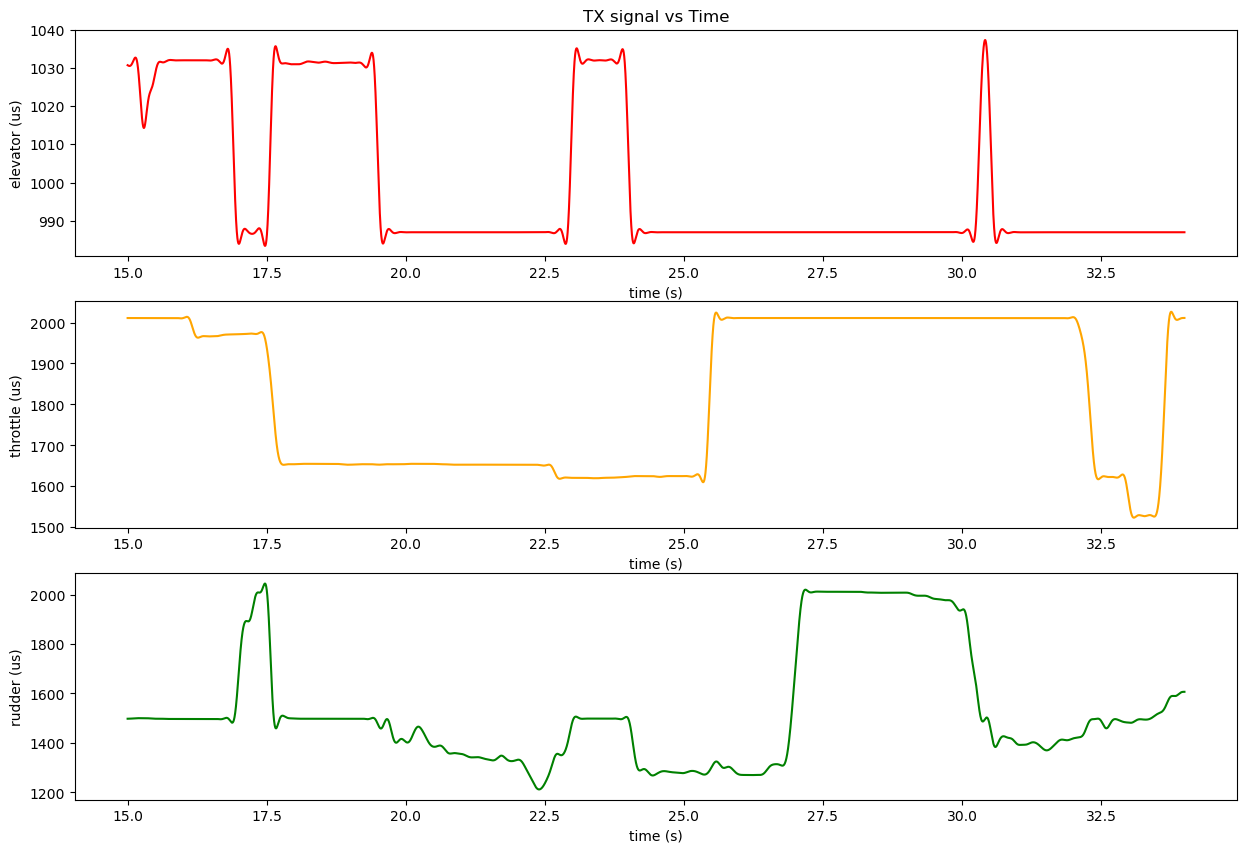

In [37]:
tx_ele = data['rcData[1]'].values
tx_ele = tx_ele[start_idx:end_idx]
tx_ele = butter_lowpass_filter(tx_ele, 5, 1000, order=4)
tx_thr = data['rcData[3]'].values
tx_thr = tx_thr[start_idx:end_idx]
tx_thr = butter_lowpass_filter(tx_thr, 5, 1000, order=4)
tx_rud = data['rcData[0]'].values
tx_rud = tx_rud[start_idx:end_idx]
tx_rud = butter_lowpass_filter(tx_rud, 5, 1000, order=4)

fig = plt.figure(figsize=(15,10))

plt.subplot(3,1,1)
plt.plot(time, tx_ele, label='elevator', color='red')
plt.xlabel('time (s)')
plt.ylabel('elevator (us)')
plt.title('TX signal vs Time')

plt.subplot(3,1,2)
plt.plot(time, tx_thr, label='throttle', color='orange')
plt.xlabel('time (s)')
plt.ylabel('throttle (us)')

plt.subplot(3,1,3)
plt.plot(time, tx_rud, label='rudder', color='green')
plt.xlabel('time (s)')
plt.ylabel('rudder (us)')

# plt.savefig(path + '/tx_signal.png')
plt.show()

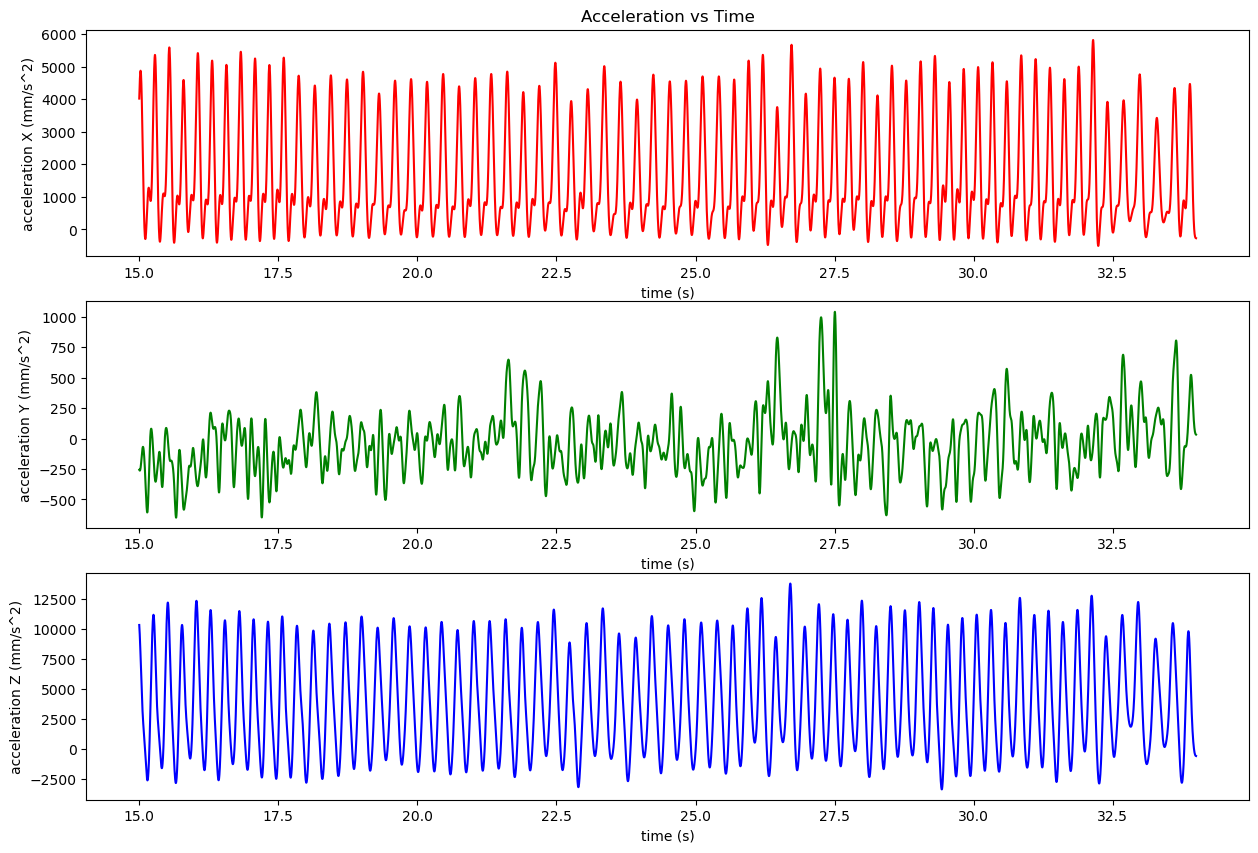

In [38]:
acc_X = data['accSmooth[0]'].values
acc_X = acc_X[start_idx:end_idx]
acc_X = butter_lowpass_filter(acc_X, 10, 1000, 4)
acc_Y = data['accSmooth[1]'].values
acc_Y = acc_Y[start_idx:end_idx]
acc_Y = butter_lowpass_filter(acc_Y, 10, 1000, 4)
acc_Z = data['accSmooth[2]'].values
acc_Z = acc_Z[start_idx:end_idx]
acc_Z = butter_lowpass_filter(acc_Z, 10, 1000, 4)

fig = plt.figure(figsize=(15,10))

plt.subplot(3,1,1)
plt.plot(time, acc_X, label='X', color='r')
plt.xlabel('time (s)')
plt.ylabel('acceleration X (mm/s^2)')
plt.title('Acceleration vs Time')

plt.subplot(3,1,2)
plt.plot(time, acc_Y, label='Y', color='g')
plt.xlabel('time (s)')
plt.ylabel('acceleration Y (mm/s^2)')

plt.subplot(3,1,3)
plt.plot(time, acc_Z, label='Z', color='b')
plt.xlabel('time (s)')
plt.ylabel('acceleration Z (mm/s^2)')

# plt.savefig(path + '/acceleration.png')
plt.show()

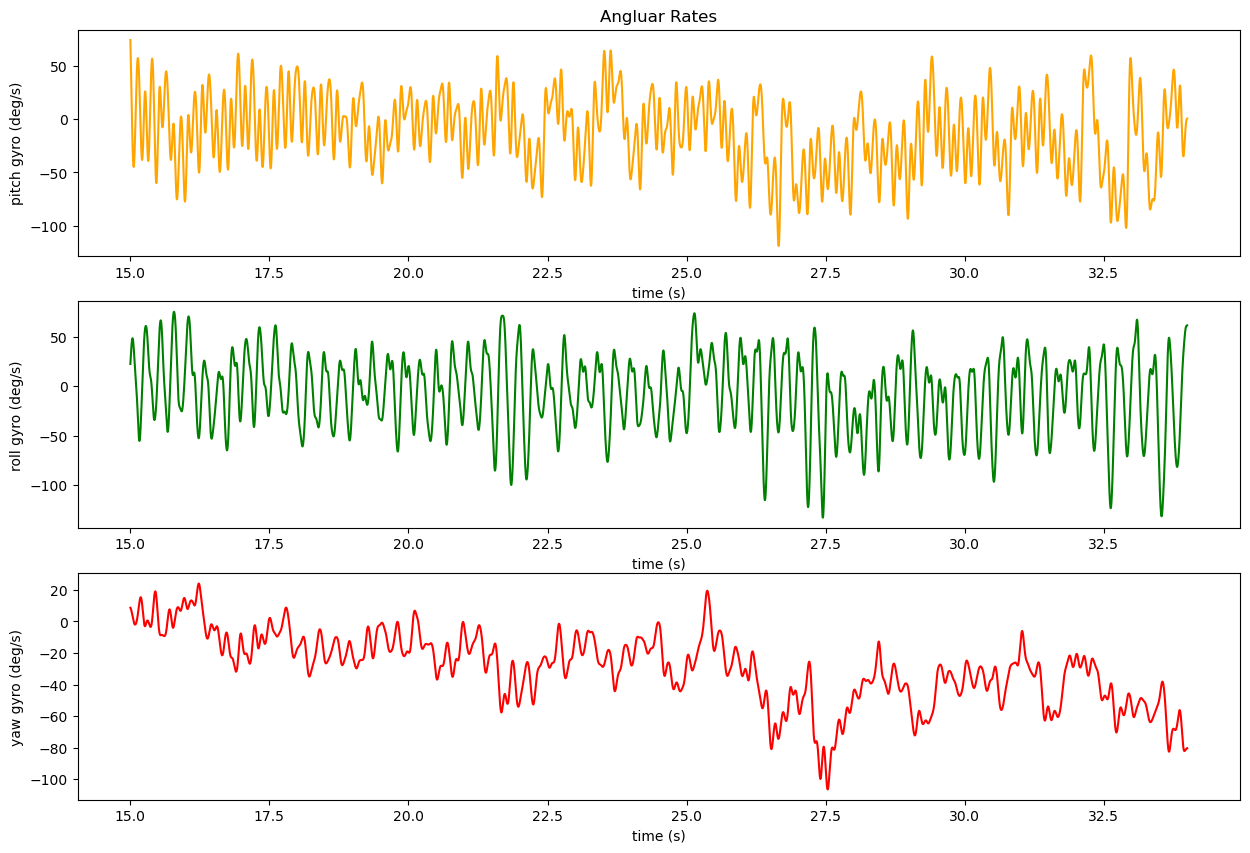

In [39]:
gyro_pitch = data['gyroRaw[1]'].values
gyro_pitch = gyro_pitch[start_idx:end_idx]
gyro_pitch = butter_lowpass_filter(gyro_pitch, 10, 1000, 4)
gyro_roll = data['gyroRaw[0]'].values
gyro_roll = gyro_roll[start_idx:end_idx]
gyro_roll = butter_lowpass_filter(gyro_roll, 10, 1000, 4)
gyro_yaw = data['gyroRaw[2]'].values
gyro_yaw = gyro_yaw[start_idx:end_idx]
gyro_yaw = butter_lowpass_filter(gyro_yaw, 10, 1000, 4)

fig = plt.figure(figsize=(15,10))

plt.subplot(3,1,1)
plt.plot(time, gyro_pitch, label='pitch', color='orange')
plt.xlabel('time (s)')
plt.ylabel('pitch gyro (deg/s)')
plt.title('Angluar Rates')

plt.subplot(3,1,2)
plt.plot(time, gyro_roll, label='roll', color='green')
plt.xlabel('time (s)')
plt.ylabel('roll gyro (deg/s)')

plt.subplot(3,1,3)
plt.plot(time, gyro_yaw, label='yaw', color='red')
plt.xlabel('time (s)')
plt.ylabel('yaw gyro (deg/s)')

# plt.savefig(path + '/angular_rates.png')
plt.show()

In [40]:
df = pd.DataFrame({'time': time, 'altitude': altiude, 'rc_ele': rc_ele, 'rc_thr': rc_thr, 'rc_rud': rc_rud, 'tx_ele': tx_ele, 'tx_thr': tx_thr, 'tx_rud': tx_rud, 'acc_X': acc_X, 'acc_Y': acc_Y, 'acc_Z': acc_Z, 'gyro_pitch': gyro_pitch, 'gyro_roll': gyro_roll, 'gyro_yaw': gyro_yaw})
file_path = path + '/' + 'data.csv'
df.to_csv(file_path, index=False)